In [ ]:
                 """Student Writing Score Prediction using Linear Regression & Logistic Regression"""

## ***Importing Necessary Libraries***

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

## ***Load the Dataset***

In [14]:
# Load the dataset
data = pd.read_csv('exams.csv')

In [15]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [45]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## ***Checking for null values***

In [16]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## ***Preprocessing the Data***

***Implementing One Hot-Encoding one Categorical features & Normalization on Numerical features.***

In [17]:
# One-hot encode categorical variables
preprocessed_data = pd.get_dummies(data, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['math score', 'reading score']
preprocessed_data[numerical_features] = scaler.fit_transform(preprocessed_data[numerical_features])


In [24]:
preprocessed_data.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,-0.577987,-0.027092,78,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
1,1.849426,1.604073,87,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
2,-0.709198,0.398430,77,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
3,0.143677,-0.027092,63,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
4,0.996551,1.036711,86,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1


In [46]:
preprocessed_data.columns

Index(['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

## ***Correlation Analysis***

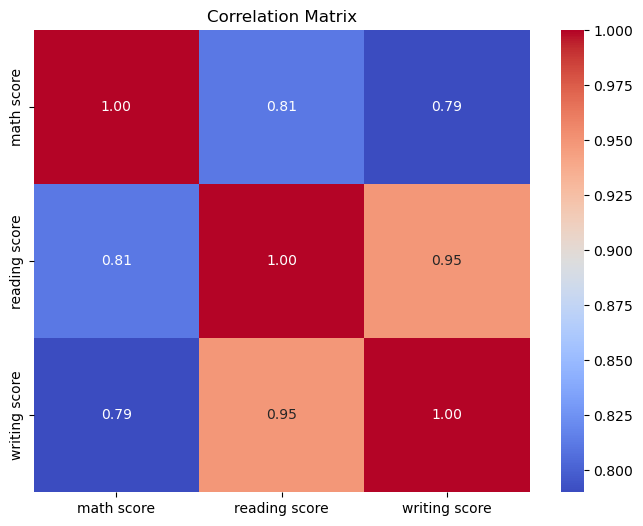

In [56]:
# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


***
Note: "1.0" indicates a perfect positive correlation (as one variable increases, the other also increases proportionally). "-1.0" indicates a perfect negative correlation (as one variable increases, the other decreases proportionally). "0.0" indicates no correlation.
***

## Correlation between Math score , Reading score, and Writing Scores



***Math Score vs. Reading Score:***

Correlation coefficient: 0.81

Interpretation: There is a strong positive correlation (0.81) between Math Score and Reading Score. This suggests that students who perform well in Math are likely to perform well in Reading, and vice versa.


***Math Score vs. Writing Score:***

Correlation coefficient: 0.79

Interpretation: There is a strong positive correlation (0.79) between Math Score and Writing Score. This indicates that students who excel in Math are likely to perform well in Writing, and vice versa.

***Reading Score vs. Writing Score:***

Correlation coefficient: 0.95

Interpretation: There is a very strong positive correlation (0.95) between Reading Score and Writing Score. This suggests that students who perform well in Reading are very likely to perform well in Writing, and vice versa.

## ***Preparing data for model training***

In [23]:
# Prepare the data for linear regression
X = preprocessed_data.drop(['writing score'], axis=1)
y = preprocessed_data['writing score']

## ***Splitting Data***

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## ***Training Linear Regression Model***

In [26]:
# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

## ***Predicting on Test Data***

In [27]:
# Predict using the linear regression model
y_pred_lr = lr_model.predict(X_test)

## ***Evaluating Linear Regression Model***

In [28]:
# Evaluate the linear regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

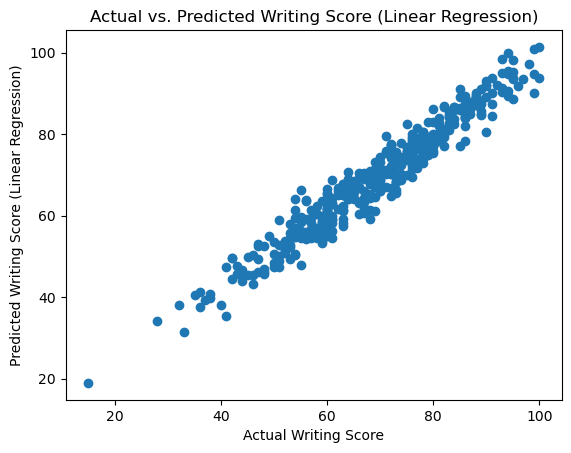

In [29]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Writing Score')
plt.ylabel('Predicted Writing Score (Linear Regression)')
plt.title('Actual vs. Predicted Writing Score (Linear Regression)')
plt.show()

## ***Training Logistic Regression Model***

In [32]:
# Train the logistic regression model as a regressor
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

## ***Predicting on Test data***

In [33]:
# Predict using the logistic regression model as a regressor
y_pred_logreg = logreg_regressor.predict(X_test)


## ***Evaluating Logistic Regression Model***

In [38]:
# Evaluate the logistic regression model as a regressor
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
mae_logreg = mean_absolute_error(y_test, y_pred_logreg)
r2_logreg = r2_score(y_test, y_pred_logreg)


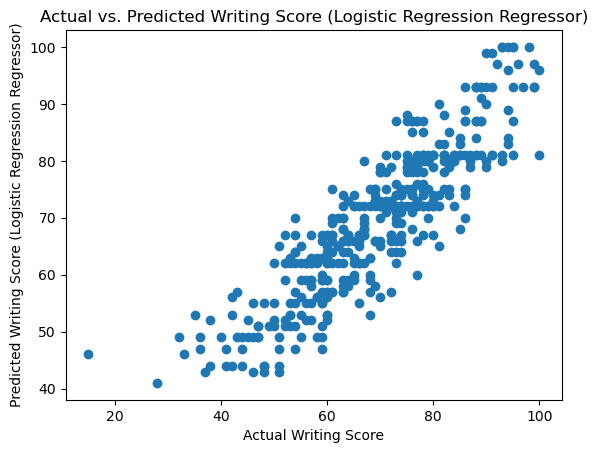

In [39]:
plt.scatter(y_test, y_pred_logreg)
plt.xlabel('Actual Writing Score')
plt.ylabel('Predicted Writing Score (Logistic Regression Regressor)')
plt.title('Actual vs. Predicted Writing Score (Logistic Regression Regressor)')
plt.show()


## ***Comparing both Linear Regression and Logistic Regression Model***

In [40]:
# Compare linear regression and logistic regression (used as a regressor)
print('Linear Regression - Mean Squared Error:', mse_lr)
print('Linear Regression - Mean Absolute Error:', mae_lr)
print('Linear Regression - R-squared:', r2_lr)

print('\nLogistic Regression (Regressor) - Mean Squared Error:', mse_logreg)
print('Logistic Regression (Regressor) - Mean Absolute Error:', mae_logreg)
print('Logistic Regression (Regressor) - R-squared:', r2_logreg)


Linear Regression - Mean Squared Error: 12.325767688543252
Linear Regression - Mean Absolute Error: 2.8199049403020946
Linear Regression - R-squared: 0.9418381803560332

Logistic Regression (Regressor) - Mean Squared Error: 46.52
Logistic Regression (Regressor) - Mean Absolute Error: 5.38
Logistic Regression (Regressor) - R-squared: 0.780485246987718


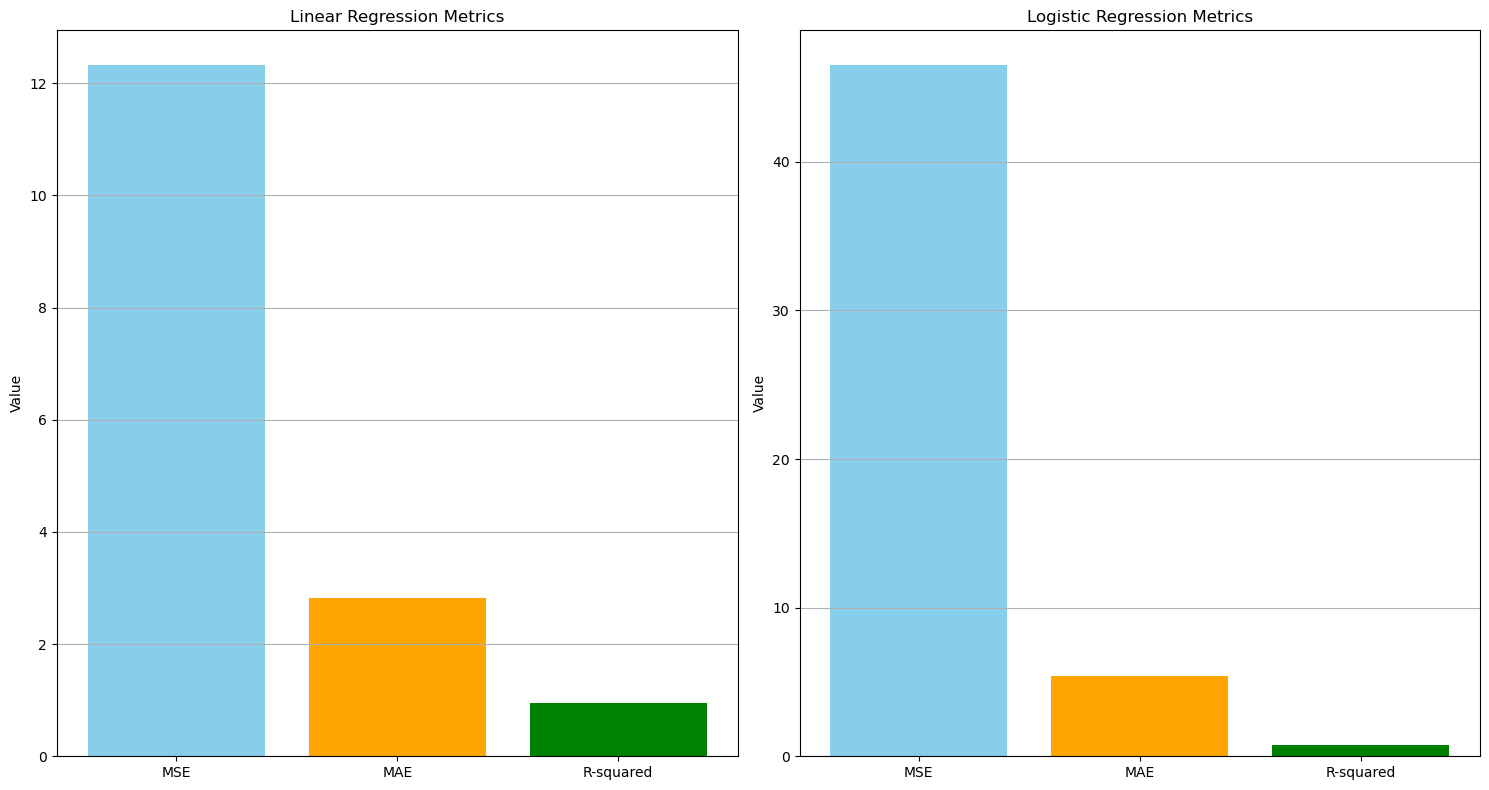

In [57]:
# Visualize MSE, MAE, R-squared
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Linear Regression
axs[0].bar(['MSE', 'MAE', 'R-squared'], [mse_lr, mae_lr, r2_lr], color=['skyblue', 'orange', 'green'])
axs[0].set_title('Linear Regression Metrics')
axs[0].set_ylabel('Value')
axs[0].grid(axis='y')

# Logistic Regression (Regressor)
axs[1].bar(['MSE', 'MAE', 'R-squared'], [mse_logreg, mae_logreg, r2_logreg], color=['skyblue', 'orange', 'green'])
axs[1].set_title('Logistic Regression Metrics')
axs[1].set_ylabel('Value')
axs[1].grid(axis='y')


plt.tight_layout()
plt.show()

## Conclusions:

***Mean Squared Error (MSE):***

Lower MSE indicates that the Linear Regression model provides more accurate predictions compared to Logistic Regression used as a regressor.


***Mean Absolute Error (MAE):***

Lower MAE indicates that the Linear Regression model provides predictions closer to the actual values compared to Logistic Regression used as a regressor.


***R-squared:***

R-squared measures how well the regression model explains the variability in the data.
Higher R-squared in Linear Regression (0.942) indicates that it's a better fit for the data compared to Logistic Regression (0.780).

In [ ]:
                                               """The End"""